In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df = pd.read_excel('/content/Приложение 4 - Данные Для SARIMAX.xlsx')

In [ ]:
df

,Дата,Мелкая бытовая техника,Акция
0,2016-03-01,498,1
1,2016-03-02,536,1
2,2016-03-03,645,1
3,2016-03-04,588,1
4,2016-03-05,638,1
...,...,...,...
56,2016-04-26,413,1
57,2016-04-27,424,1
58,2016-04-28,362,1
59,2016-04-29,340,1


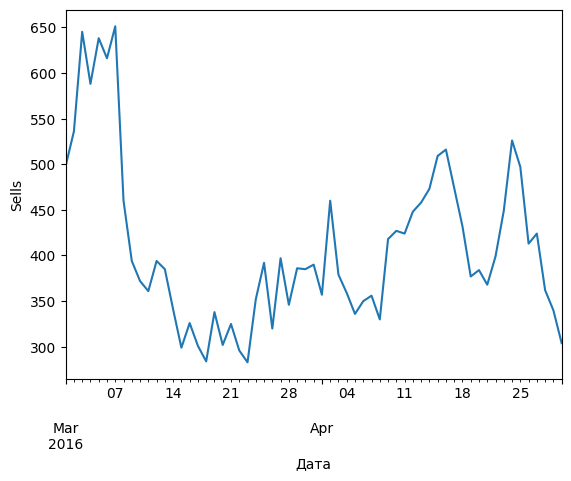

In [ ]:
import matplotlib.pyplot as plt
df.plot(x="Дата", y="Мелкая бытовая техника", legend=None)
plt.ylabel("Sells")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

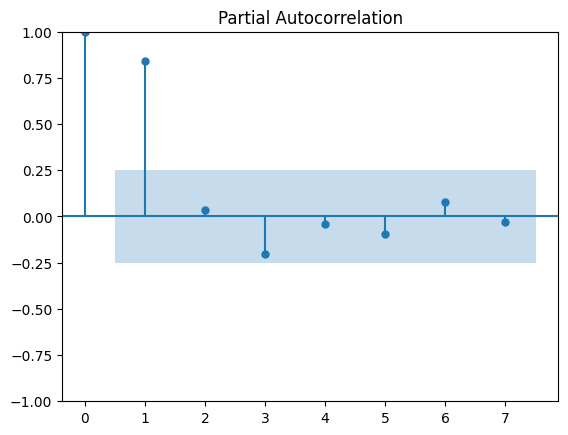

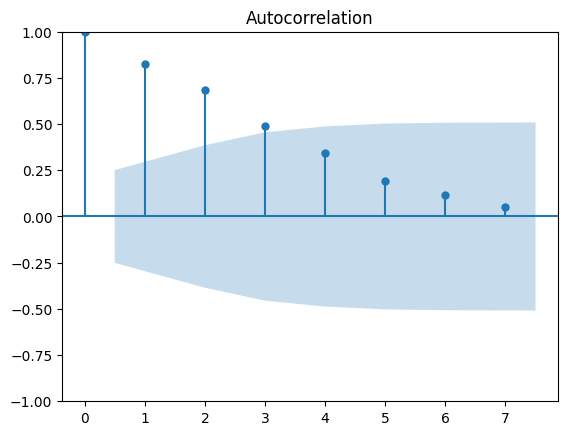

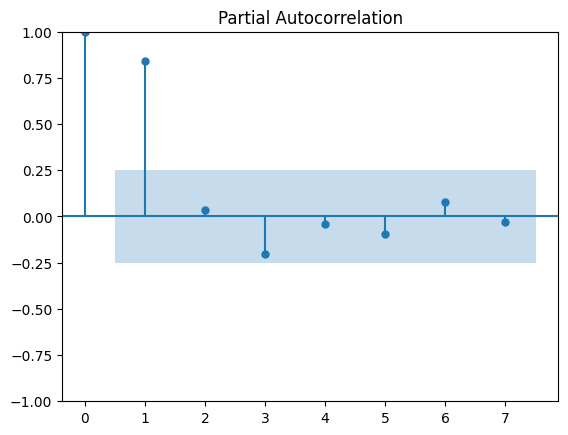

In [ ]:
y = df[['Мелкая бытовая техника']].to_numpy()

plot_acf(y, lags=7)
plot_pacf(y, method="ols",lags=7)

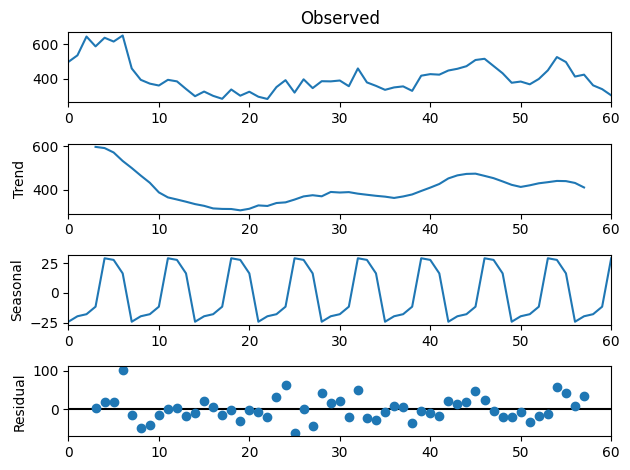

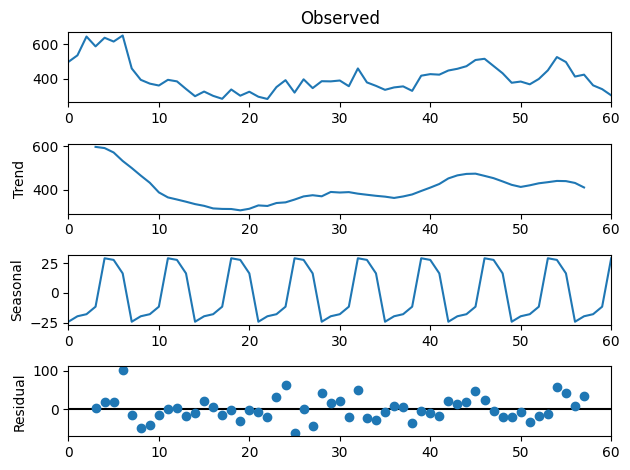

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(y, period = 7, model="additive")
decompose_data.plot()

In [ ]:
import statsmodels.api as sm
resDiff = sm.tsa.arma_order_select_ic(y, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dis

ARMA(p,q) = (2, 2) is the best.


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
df

,Дата,Мелкая бытовая техника,Акция
0,2016-03-01,498,1
1,2016-03-02,536,1
2,2016-03-03,645,1
3,2016-03-04,588,1
4,2016-03-05,638,1
...,...,...,...
56,2016-04-26,413,1
57,2016-04-27,424,1
58,2016-04-28,362,1
59,2016-04-29,340,1


In [ ]:
Y = df[['Мелкая бытовая техника']]
Y = Y[:-14]
X = df.iloc [:, 2]
X = X[:-14]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

# SARIMA

In [ ]:
def mape( actual , pred ): 
 actual, pred = np.array(actual), np.array(pred)
 return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
y3 = y.copy()
y3 = y3[:-14]
model2 = SARIMAX(y3, order=(1, 1, 1),seasonal_order=(1, 1, 1, 7))
model_fit = model2.fit(disp=False)
yhat1 = model_fit.predict(start=46, end = 60)

In [ ]:
y4 = np.append(y3, yhat1)

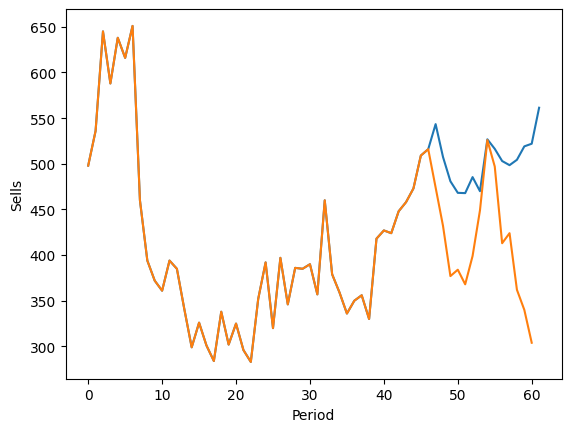

In [ ]:
plt.ylabel("Sells")
plt.xlabel("Period")
#plt.plot(y3)
plt.plot(y4)
plt.plot(y)

In [ ]:
mape(y[-14:],y4[-14:])

25.887181726536667

# SARIMAX

In [ ]:
exog = df.iloc [:, 2].to_numpy()
exog = exog[:-14]
exog1 = [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0]

In [ ]:
y1 = y.copy()
y1 = y1[:-14]
model = SARIMAX(y1, order=(1, 1, 1),seasonal_order=(1, 1, 1, 7), exog = exog)
model_fit = model.fit(disp=False)
yhat = model_fit.predict(start=46, end = 60, exog = exog1)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
y2 = np.append(y1, yhat)

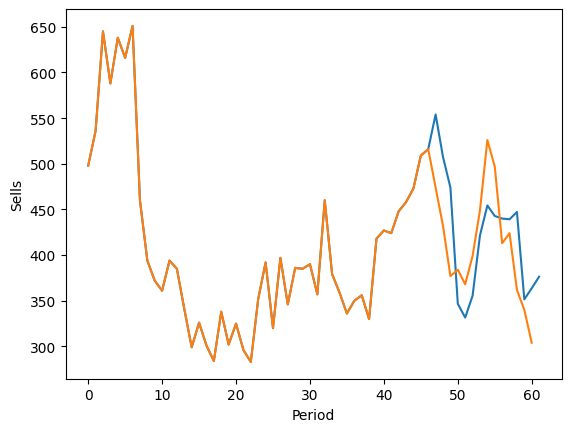

In [ ]:
plt.ylabel("Sells")
plt.xlabel("Period")
#plt.plot(y1)
plt.plot(y2)
plt.plot(y)

In [ ]:
mape(y[-14:],y2[-14:])

16.194515043644344

# Prophet

In [ ]:
!pip install pystan==2.19.1.1 --quiet
!pip install fbprophet --quiet
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 51.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '${:,.2f}'.format

In [ ]:
df = pd.read_excel('/content/Приложение 4 - Данные Для SARIMAX.xlsx')

In [ ]:
df = df[['Дата', 'Мелкая бытовая техника']]

In [ ]:
df.columns = ['ds', 'y']

In [ ]:
x = df["ds"]
y = df["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of sells",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

In [ ]:
train_df = df[:-14] 

In [ ]:
m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=14)
forecast = m.predict(future)

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
forecast

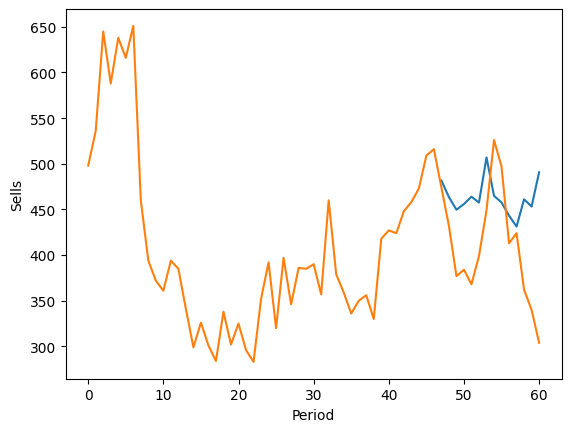

In [ ]:
plt.ylabel("Sells")
plt.xlabel("Period")
y1 = df['y']
#plt.plot(y1)
y2 = forecast['yhat_upper'][-14:]
plt.plot(y2)
plt.plot(y)

In [ ]:
mape(y[-14:],y2[-14:])

17.945397424729492

# Prophet with Regressors

In [ ]:
df = pd.read_excel('/content/Приложение 4 - Данные Для SARIMAX.xlsx')

In [ ]:
dfr = df[['Дата', 'Мелкая бытовая техника']]

In [ ]:
r = df.iloc [:, 2]
r=r[:-14] 

In [ ]:
r2 = df.iloc [:, 2][-14:]

In [ ]:
reg = Prophet()

In [ ]:
reg.add_regressor('r')

In [ ]:
dfr.columns = ['ds', 'y']
train_df = dfr[:-14] 

In [ ]:
train_df['r']=r

In [ ]:
train_df

In [ ]:
reg.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = reg.make_future_dataframe(periods=14)
future['r']=df.iloc [:, 2]
forecast = reg.predict(future)

In [ ]:
plot_plotly(reg, forecast)

In [ ]:
plot_components_plotly(reg, forecast)

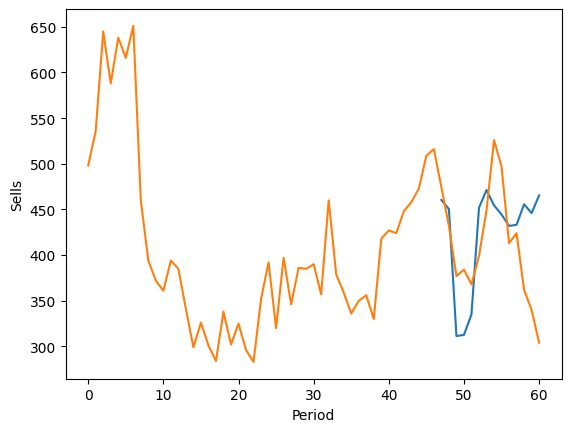

In [ ]:
plt.ylabel("Sells")
plt.xlabel("Period")
y1 = dfr['y']
#plt.plot(y1)
y2 = forecast['yhat'][-14:]
plt.plot(y2)
plt.plot(y)

In [ ]:
mape(y[-14:],y2[-14:])

15.095193392692055